In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
from scipy.stats import pearsonr
%matplotlib inline

### Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [2]:
ratings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                    [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                    [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                    [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                    [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                    [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                    [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                    [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                    [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                    [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

<b> a) </b> Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [3]:
def cosine(a, b):
    aLength = np.linalg.norm( a )
    bLength = np.linalg.norm( b )
    return np.dot(a, b) / (aLength * bLength)

In [4]:
for n in range(len(ratings)):
    cos_max = 0
    for i, line in enumerate(ratings):
        if n != i: # это позволяет не сравнивать пользователя с самим собой
            if cosine(line, ratings[n]) > cos_max:
                cos_max = cosine(line, ratings[n])
    for i, line in enumerate(ratings):
        if cosine(line, ratings[n]) == cos_max:
            print(f'Наиболее похожим на пользователя с ID {n+1} является пользователь с ID {i+1}\nСправочно: косинусное расстояние составляет {cos_max}')

Наиболее похожим на пользователя с ID 1 является пользователь с ID 9
Справочно: косинусное расстояние составляет 0.9106598233573044
Наиболее похожим на пользователя с ID 2 является пользователь с ID 5
Справочно: косинусное расстояние составляет 0.8713805223930228
Наиболее похожим на пользователя с ID 3 является пользователь с ID 10
Справочно: косинусное расстояние составляет 0.9187305147356807
Наиболее похожим на пользователя с ID 4 является пользователь с ID 10
Справочно: косинусное расстояние составляет 0.8588686958710952
Наиболее похожим на пользователя с ID 5 является пользователь с ID 9
Справочно: косинусное расстояние составляет 0.8794847716076252
Наиболее похожим на пользователя с ID 6 является пользователь с ID 10
Справочно: косинусное расстояние составляет 0.8551490764118892
Наиболее похожим на пользователя с ID 7 является пользователь с ID 4
Справочно: косинусное расстояние составляет 0.832742107055763
Наиболее похожим на пользователя с ID 8 является пользователь с ID 6
Справ

<b> b) </b>Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

С помощью коэффициента корреляции Пирсона можно избавиться от столбцов, создающих мультиколлинеарность

In [5]:
ratings_tr = ratings.T
# ratings_tr

In [6]:
for n in range(len(ratings_tr)):
    corr_max = 0
    for i, line in enumerate(ratings_tr):
        if n != i:
            if abs(pearsonr(line, ratings_tr[n])[0]) > corr_max:
                corr_max = abs(pearsonr(line, ratings_tr[n])[0])
    for i, line in enumerate(ratings_tr):
        if abs(pearsonr(line, ratings_tr[n])[0]) == corr_max:
            print(f'Наибольшая корреляция у фильма {n} прослеживается с фильмом {i}')

Наибольшая корреляция у фильма 0 прослеживается с фильмом 7
Наибольшая корреляция у фильма 1 прослеживается с фильмом 4
Наибольшая корреляция у фильма 2 прослеживается с фильмом 8
Наибольшая корреляция у фильма 3 прослеживается с фильмом 14
Наибольшая корреляция у фильма 4 прослеживается с фильмом 1
Наибольшая корреляция у фильма 5 прослеживается с фильмом 7
Наибольшая корреляция у фильма 6 прослеживается с фильмом 11
Наибольшая корреляция у фильма 7 прослеживается с фильмом 8
Наибольшая корреляция у фильма 8 прослеживается с фильмом 7
Наибольшая корреляция у фильма 9 прослеживается с фильмом 7
Наибольшая корреляция у фильма 10 прослеживается с фильмом 2
Наибольшая корреляция у фильма 11 прослеживается с фильмом 6
Наибольшая корреляция у фильма 12 прослеживается с фильмом 7
Наибольшая корреляция у фильма 13 прослеживается с фильмом 2
Наибольшая корреляция у фильма 14 прослеживается с фильмом 12


В первую очередь удаляем по одному фильму из пар со взаимной наибольшей корреляцией, т.е. 4, 8, 11.  
Затем наиболее часто коррелируемые, т.е. 1, 2, 6, 7, 12, 14 (и 13).

In [7]:
ratings_tr_cut = np.delete(ratings_tr, (4, 8, 11, 1, 2, 6, 7, 12, 14, 13), axis=0)
ratings_tr_cut.T

array([[ 4,  4,  6,  6,  9],
       [ 9, 10,  8,  2,  1],
       [ 1,  8,  9,  5,  2],
       [ 6,  7,  9,  1,  6],
       [ 3,  5,  9,  9,  1],
       [ 8,  3,  6,  6,  1],
       [ 9,  8, 10,  2,  9],
       [ 4,  4, 10,  8,  7],
       [ 2,  6,  6,  6, 10],
       [ 5,  8,  7, 10,  8]])

### Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

In [8]:
from sympy import *

**Решение на SciPy**

Найдем производную

In [9]:
x = symbols('x')
fx = tan(sin(x) + cos(2*x + 3))**2
deriv = diff(fx)
deriv

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

Посчитаем значение производной в точке х = 1

In [10]:
y = deriv.evalf(subs={x:1})
y

55.3859176353379

**Решение "на бумажке"**  

$f'(x) = 2(−2sin(2𝑥+3)+cos(𝑥))(tg^2(sin(𝑥)+cos(2𝑥+3))+1)tg(sin(𝑥)+cos(2𝑥+3))=$
$=2(−2sin(5)+cos(1))(tg^2(sin(1)+cos(5))+1)tg(sin(1)+cos(5))=$  
$=2\cdot2.45815085519442\cdot5.38185372806127\cdot2.09328777956144=55.3859$

### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку <b>error</b>

In [11]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [12]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [13]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

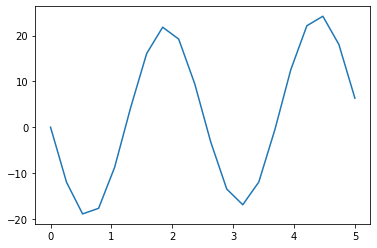

In [14]:
plt.plot(x, fx)
plt.show()

In [15]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [16]:
res = minimize(error, fx, method='nelder-mead', options={'xtol': 1e-6, 'disp': True})

Optimization terminated successfully.
         Current function value: 232.958617
         Iterations: 1554
         Function evaluations: 2325


### Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [17]:
rand_var = np.random.randint(1, 21, 50000)
rand_var = rand_var.reshape((1000, 50))
rand_var.shape

(1000, 50)

In [18]:
mean_list = []
for i in rand_var:
    mean_list.append(i.mean())

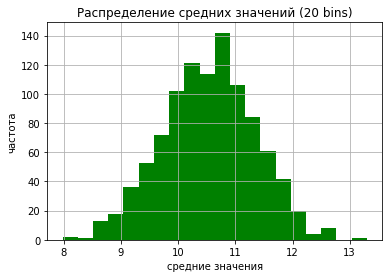

In [19]:
plt.hist(mean_list, 20, color='g')

plt.xlabel('средние значения')
plt.ylabel('частота')
plt.title('Распределение средних значений (20 bins)')
plt.grid(True)
plt.show()

### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

 [1, 1]]

**Решение на Python**

In [20]:
M = np.array([[1, 4], [1, 1]])
print(M)

[[1 4]
 [1 1]]


In [21]:
w, v = np.linalg.eig(M)
for i in range(len(w)):
    print(f'Собственному значению {str(w[i])} соответствует собственный вектор {str(v[:,i])}')

Собственному значению 3.0000000000000004 соответствует собственный вектор [0.89442719 0.4472136 ]
Собственному значению -0.9999999999999996 соответствует собственный вектор [-0.89442719  0.4472136 ]


**Решение "на бумажке"**

$\boldsymbol{A}=\begin{bmatrix}
1 & 4\\ 
1 & 1
\end{bmatrix}$

$\begin{bmatrix}
1-\lambda & 4\\ 
1 & 1-\lambda
\end{bmatrix}=0$

$\lambda^2-2\lambda-3=0$

$\lambda_1=-1$  
$\lambda_2=3$

При $\lambda_1=-1$:  

$\begin{cases}
 & 2x+4y=0 \\ 
 & x+2y=0  
\end{cases}$  

$\boldsymbol{v_1}=\begin{bmatrix}
2\\ 
-1
\end{bmatrix}$

При $\lambda_2=3$:  

$\begin{cases}
 & -2x+4y=0 \\ 
 & x-2y=0  
\end{cases}$  

$\boldsymbol{v_2}=\begin{bmatrix}
2\\ 
1
\end{bmatrix}$